In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data from .csv file
data = np.genfromtxt('spectroscopy data.csv', delimiter=',')

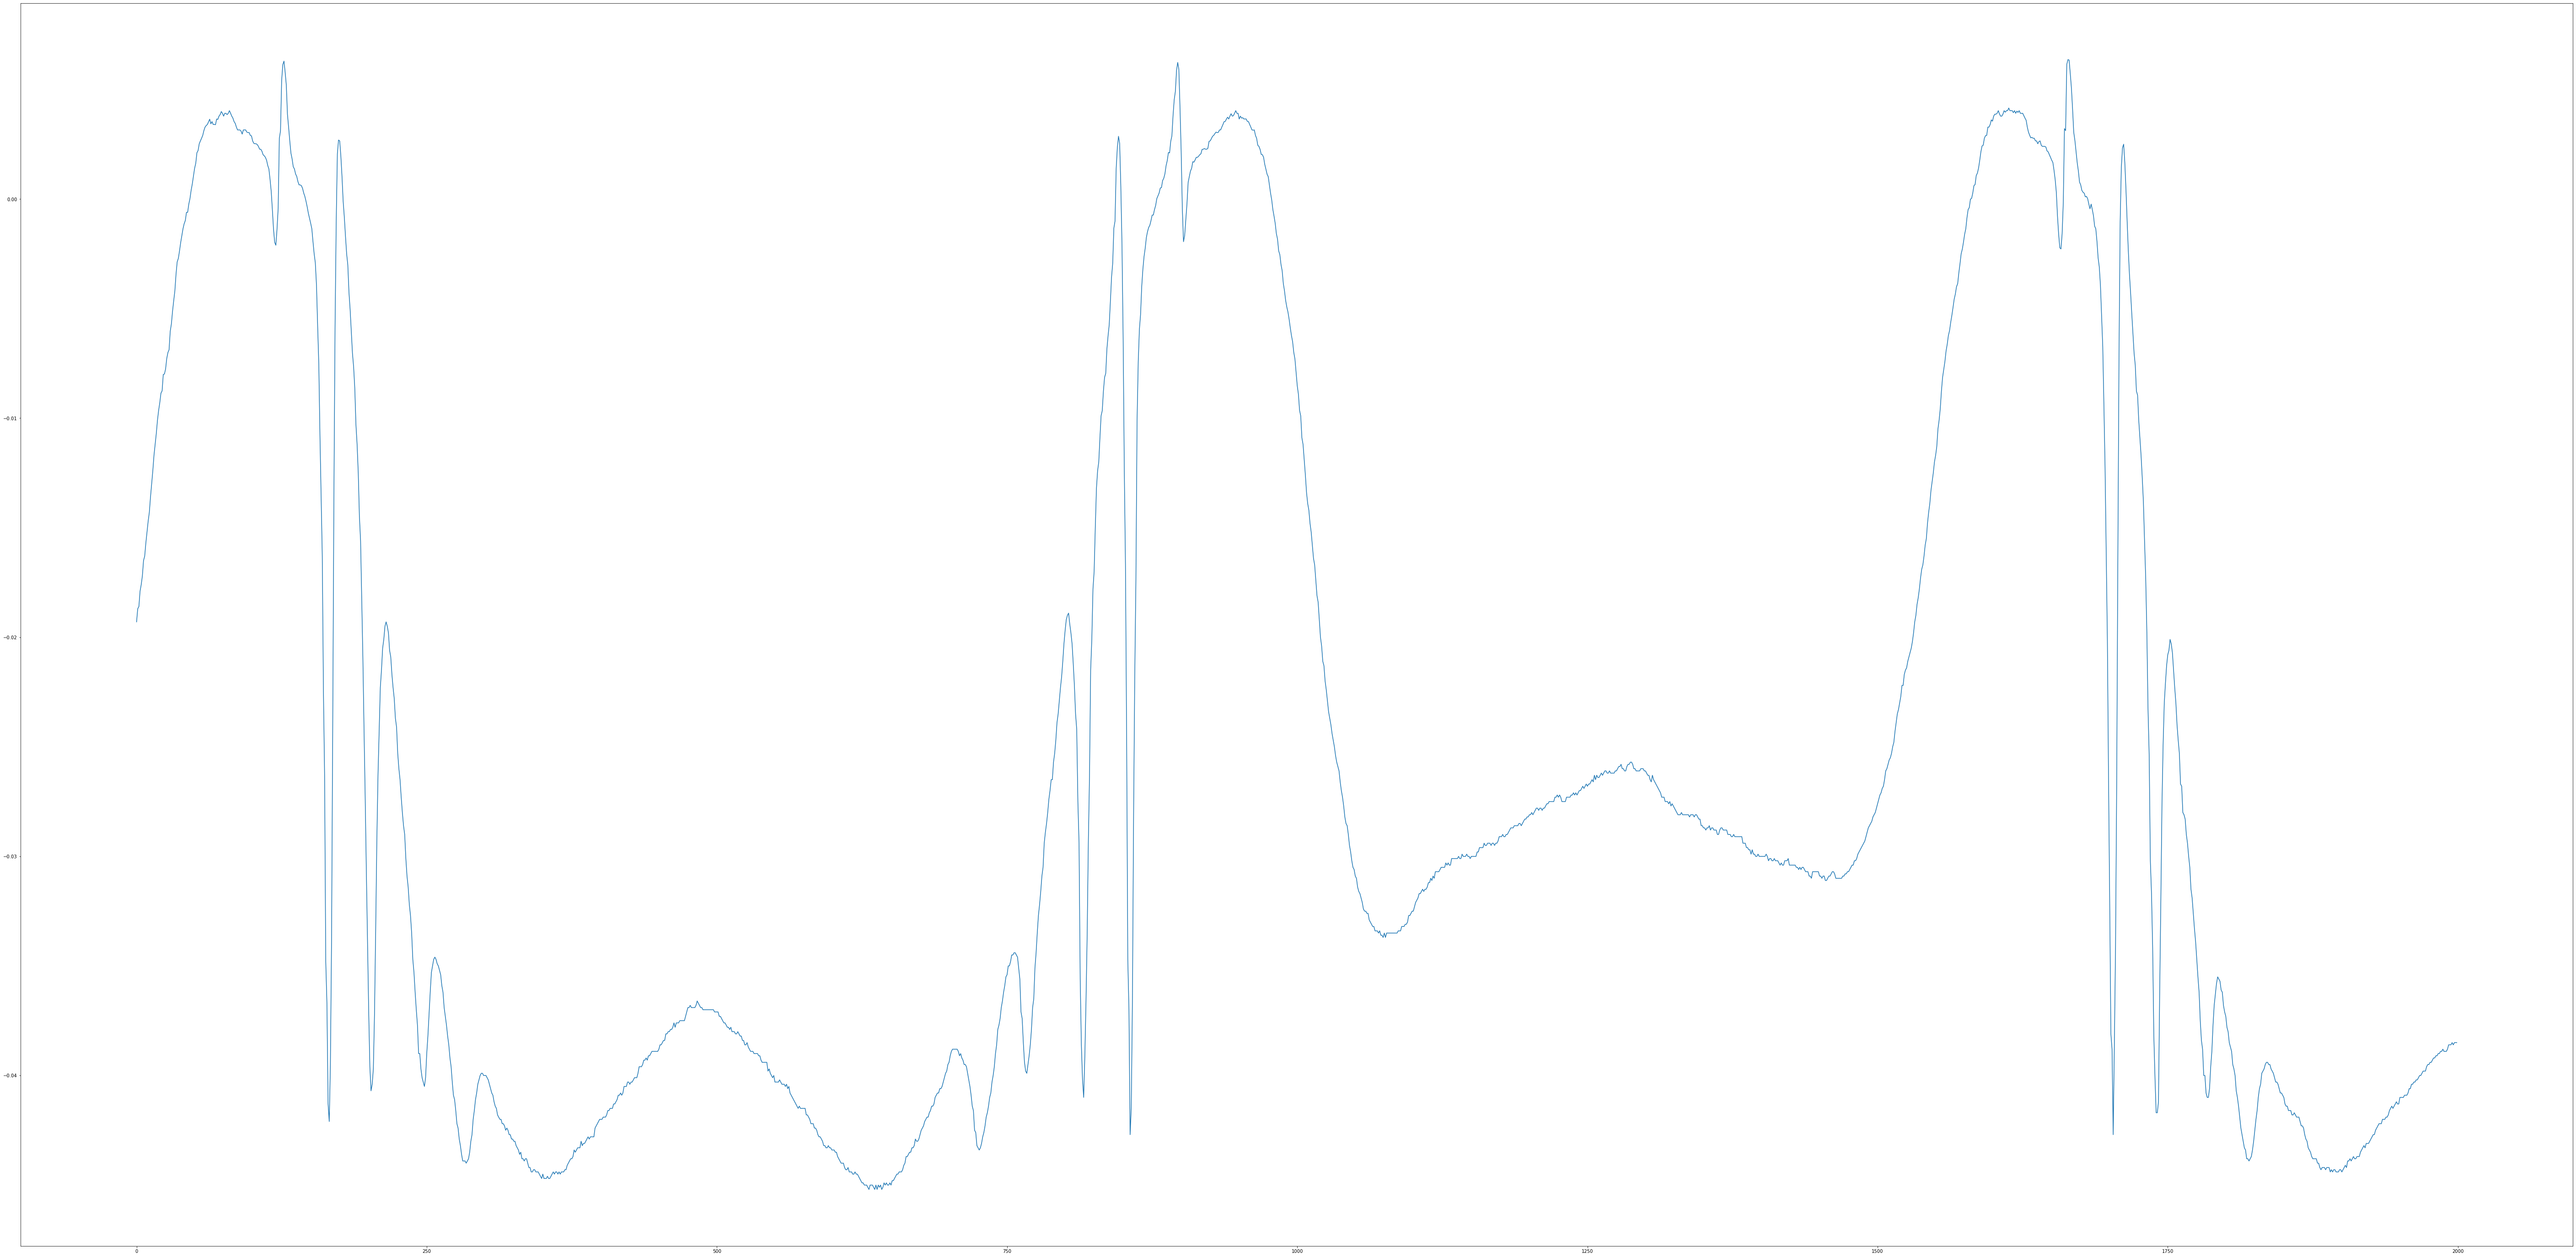

In [3]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(data[:,4])
# plt.plot((data[:,2]-np.mean(data[:,2]))/1000)
plt.show()

In [4]:
error = data[np.argmin(data[:,2]):,4]

In [5]:
np.argmin(data[:,2])

482

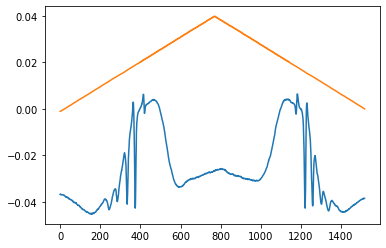

In [6]:
plt.plot(error)
plt.plot(data[np.argmin(data[:,2]):,2]/500)

In [10]:
avg_error = []
avg_filter = [0]*10

deri = []
deri_filter = [0]*20

d_curr = 1  # -1 -> -ve and +1 -> +ve
d_prev = 1

max_val_index = 0
max_val = 5
min_val_index = 0
min_val = 5
min_index = []
max_index = []
change = False
for i in range(0, len(error)//2):
    avg_filter.pop(0)
    avg_filter.append(error[i])
    avg_error.append(np.average(avg_filter))
    if(i>0):
        deri_filter.pop(0)
        deri_filter.append(avg_error[-1] - avg_error[-2])
        deri.append(np.average(deri_filter))
    if(avg_error[i] > max_val):
        max_val_index = i
        max_val = avg_error[i]
    if(avg_error[i] < min_val):
        min_val_index = i
        min_val = avg_error[i]
    if(i>1):
        if(min_val < avg_error[i] and deri[-2]*deri[-1]<0):
            min_index.append(min_val_index)
            min_val = 5
        if(max_val > avg_error[i] and deri[-2]*deri[-1]<0):
            max_index.append(max_val_index)
            max_val = -5
        

In [11]:
min_index, max_index

([161, 171, 249, 261, 289, 299, 338, 348, 379, 392, 428, 444, 599],
 [0, 228, 278, 325, 367, 418, 469, 481])

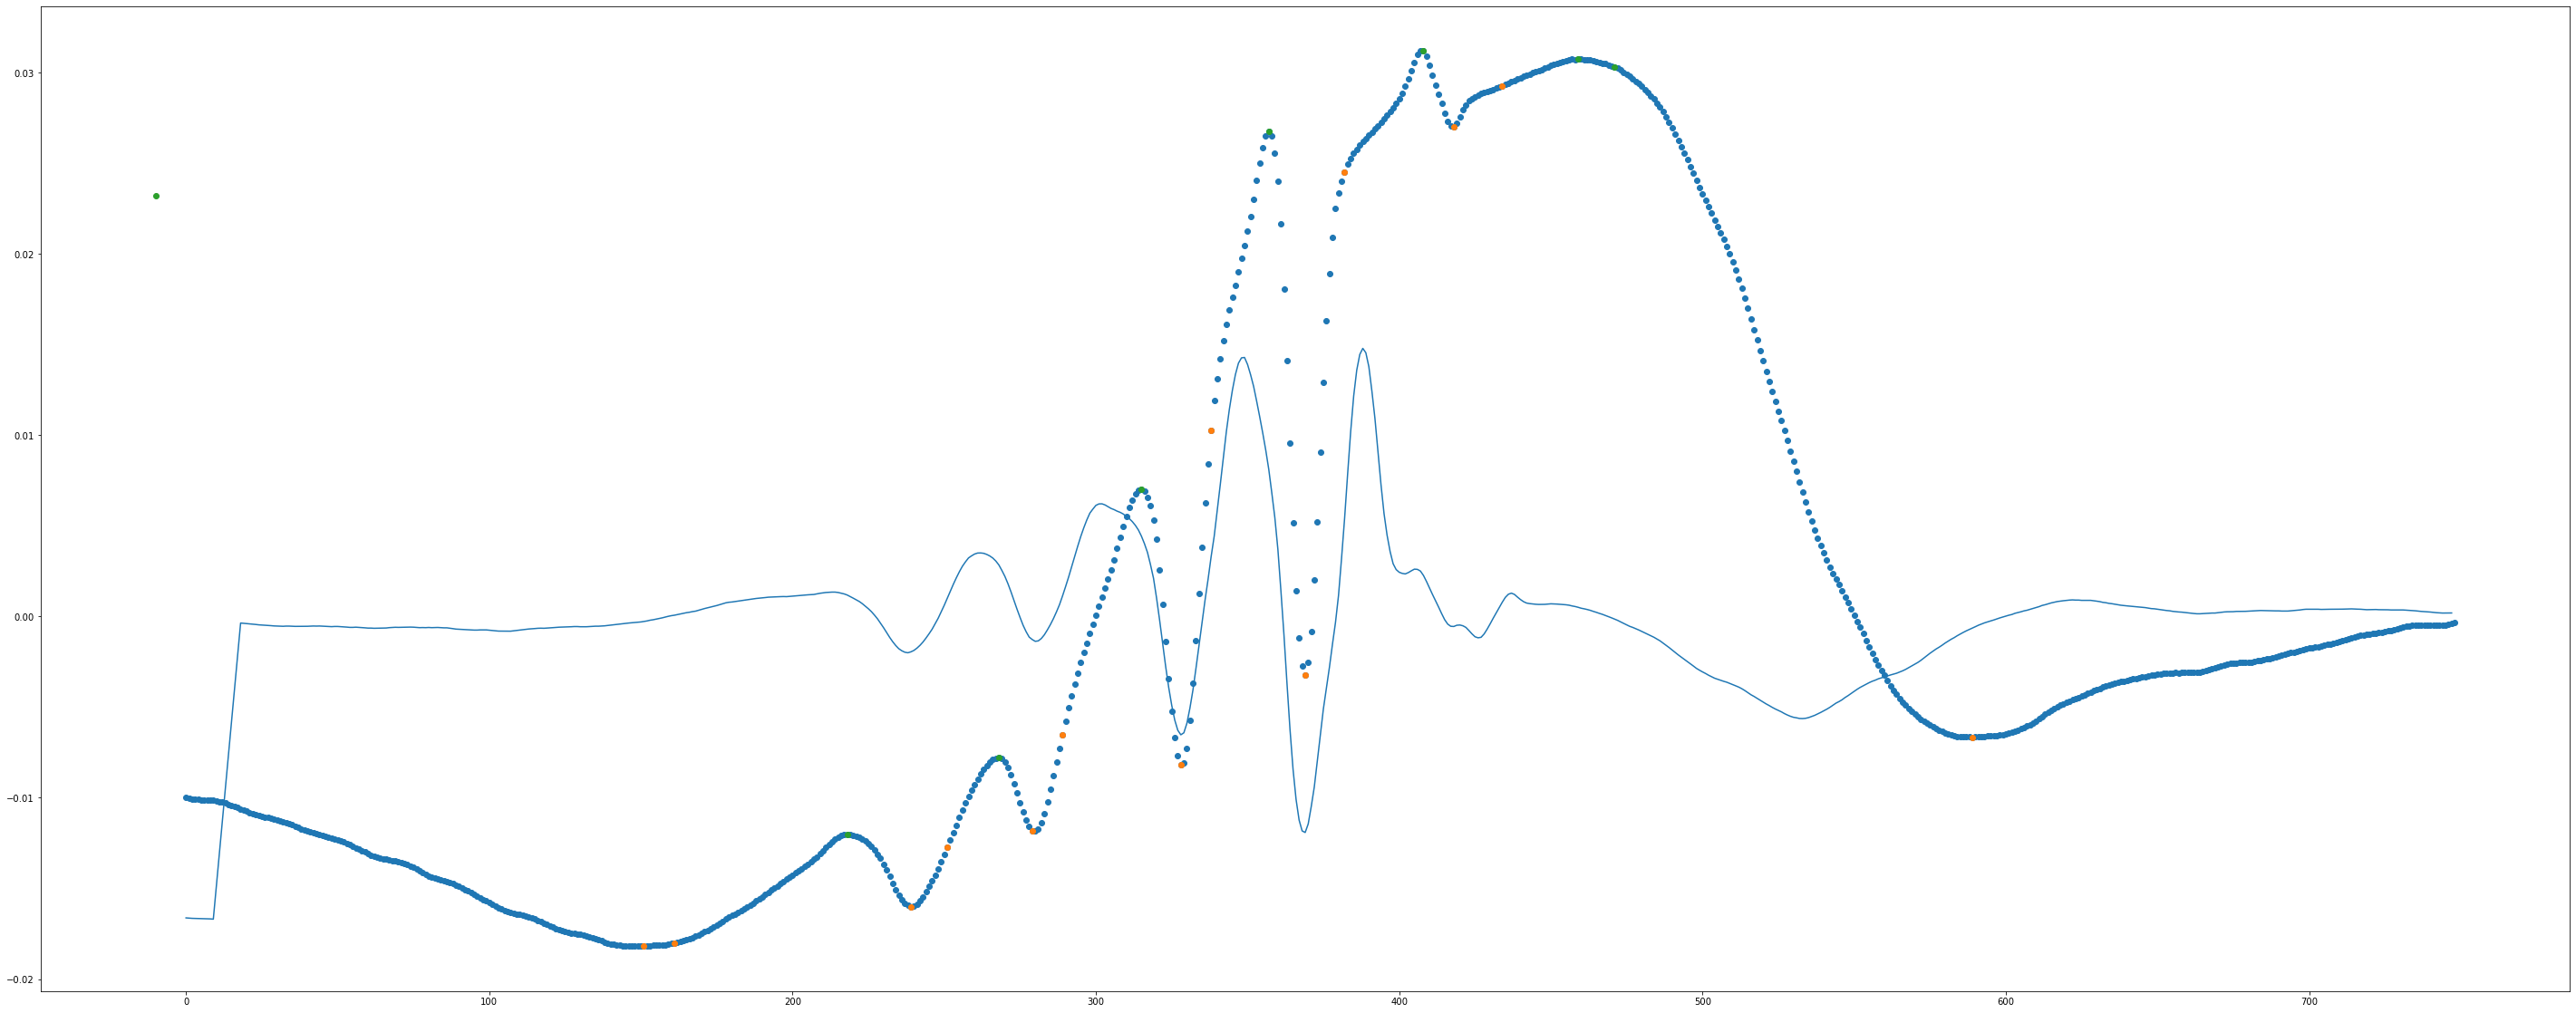

In [12]:
fig,ax = plt.subplots(1,1,figsize= (50,20))
# plt.plot(np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i for i in range(0,len(avg_error[10:]))],np.asarray(avg_error[10:]) - np.mean(avg_error[10:]))
plt.scatter([i-10 for i in min_index], [avg_error[i]- np.mean(avg_error[10:]) for i in min_index])
plt.scatter([i-10 for i in max_index], [avg_error[i]- np.mean(avg_error[10:]) for i in max_index])
plt.plot(np.asarray(deri[10:])*10)
plt.show()